### Data Wrangling

In [1]:
import pandas as pd

df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv').rename(columns={'cases_weekly': 'cases'})
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [2]:
total_cases_per_country = df.groupby('countriesAndTerritories').cases.sum().rename(lambda x: x.replace('_',' '), axis=0)
total_cases_per_country.unique()


array([   49273,    48530,    92102,     7338,    16188,       10,
            148,  1498160,   148682,     5049,    28031,   320036,
         175874,     7674,    89143,   490533,      292,   160295,
         608001,     9295,     3090,      431,      438,   147150,
            173,   101117,    12501,  6901952,       76,      152,
         179449,     4030,      729,      359,    25143,   460743,
          11357,      696,      298,     4936,     1770,   571919,
          92021,  1425774,      628,     6049,   150947,    21680,
         175886,     9423,     3624,    15101,   581079,    14512,
         109758,     5728,       87,   154692,   202110,   121575,
          41880,     5185,      711,    18055,     6768,   116769,
             19,      528,       46,    30810,  2376852,    15618,
           9330,     3782,   191063,  1337078,    53014,     1075,
         124534,       69,     7106,   129282,      289,    13420,
           2444,     5920,     9565,       26,   114359,   283

In [3]:
#pip install cartopy

In [6]:
%matplotlib inline
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
from matplotlib import cm
from matplotlib.ticker import EngFormatter, MaxNLocator
import color_utils

In [9]:
import matplotlib.cm
print(matplotlib.cm.cmap_d.keys())

KeysView(<matplotlib.cm._DeprecatedCmapDictWrapper object at 0x7fb8de569d60>)


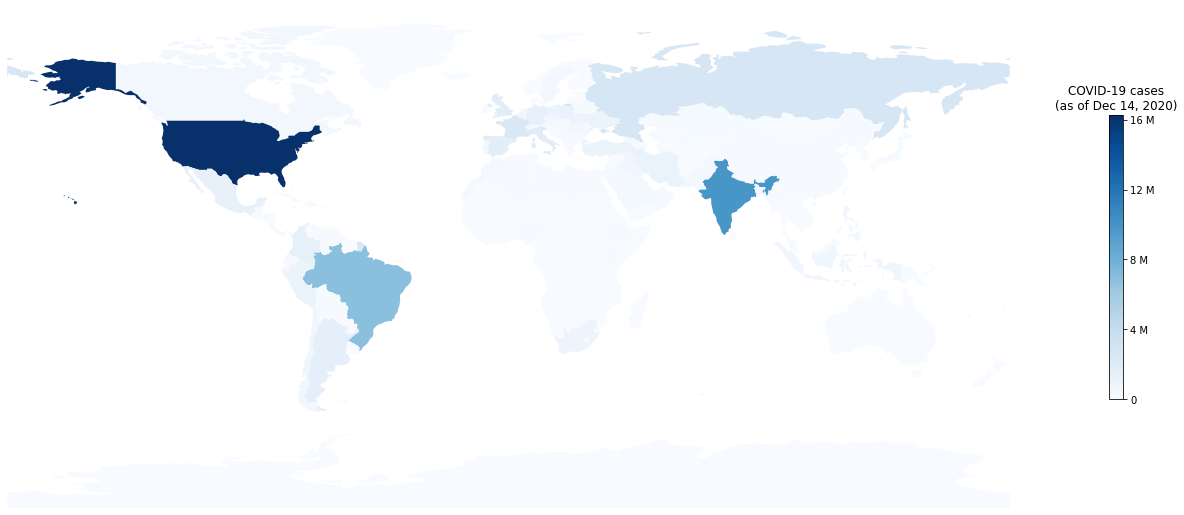

In [12]:
# build layout

fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(1,10)
map_subplot = fig.add_subplot(gs[0, :9], projection=ccrs.PlateCarree())
cbar_subplot = fig.add_subplot(gs[0,9])


colormap = cm.get_cmap('Blues')

alternate_names = {
    'Tanzania': 'United Republic of Tanzania',
    'The Bahamas': 'Bahamas',
    'Falkland Islands': 'Falkland Islands (Malvinas)',
    'Somaliland': 'Somalia',
    'Republic of Macedonia': 'North Macedonia',
    'East Timor': 'Timor Leste',
    'Ivory Coast': 'Cote dIvoire',
    'Guinea-Bissau': 'Guinea Bissau',
    'Republic of the Congo': 'Democratic Republic of the Congo',
    'eSwatini': 'Eswatini',
    'The Gambia': 'Gambia',
    "People's Republic of China": 'China',
    'Brunei': 'Brunei Darussalam',
    'Czech Republic': 'Czechia'
}




# get shapefile for drawing the map
countries_shp = shpreader.natural_earth(
    resolution='110m', category ='cultural' , name='admin_0_countries'
)



# add countries to the plot, shading them by the number of cases of COVID-19

for country in shpreader.Reader(countries_shp).records():
    country_name = country.attributes['NAME_EN']
    country_name = alternate_names.get(country_name, country_name)
    
    map_subplot.add_geometries(
        [country.geometry],
        ccrs.PlateCarree(),
        facecolor = colormap(total_cases_per_country.get(country_name,0)/total_cases_per_country.max()),
        label = country_name
    )
    
    
# create a colorbar for the map


# create a colorbar for the map
cbar = color_utils.draw_cmap(
    colormap, 
    values=np.array([np.concatenate([[0], total_cases_per_country])]), 
    orientation='vertical', 
    ax=cbar_subplot
)


cbar.ax.yaxis.set_major_formatter(EngFormatter())
cbar.ax.yaxis.set_major_locator(MaxNLocator(5))
max_full_day = pd.to_datetime(df.dateRep, format='%d/%m/%Y').max()
cbar.ax.set_title(f'COVID-19 cases\n(as of {max_full_day.strftime("%b %d, %Y")})')


# remove the box around the map
for spine in map_subplot.spines:
    map_subplot.spines[spine].set_visible(False)
